In [20]:
#set NK parameters and points for the x and y grid of the heatmap
import numpy as np
import canonical_nk as nk
params_d = {'beta': 0.99, 'gamma_pi': 1.5, 'gamma_y': 0.25, 'kappa': 0.05, 'dpbar': 1.005}
params = np.array(list(params_d.values()))


p = 0.98
rho = 2*p-1
ns = 51
P = nk.transmat(ns,p,p)
etastd = 0.0035

psi = np.sqrt(ns-1)*etastd
eta = np.linspace(-psi,psi,num=ns)
(solution_type,yy,dp,notr,nomr) = nk.solve_model(eta,P,params,ns)

ns1 = 101
etastd1 = psi/np.sqrt(ns1-1)
innovstd = np.sqrt(1-rho**2)*etastd1
P1 =nk.transmat(ns,p,p)
eta1 = np.linspace(-psi,psi,num=ns)
(solution_type1,yy1,dp1,notr1,nomr1) = nk.solve_model(eta1,P1,params,ns)
print(rho,etastd1,innovstd,psi,solution_type,solution_type1)

0.96 0.0024748737341529167 0.0006929646455628168 0.024748737341529166 -1 -1


In [2]:
#generate Heat Map data
Nrow = 50
Ncol = 50
pvec = np.linspace(0.95,0.995,num=Ncol)
eta_psi = np.linspace(0.005,0.035,num=Nrow)
rhoeta = 2*pvec-1
stdeta = eta_psi/np.sqrt(ns-1)
stdeta1 = eta_psi/np.sqrt(ns1-1)
sol = np.zeros([Nrow,Ncol],dtype=int)
sol1 = np.zeros([Nrow,Ncol],dtype=int)

for i in np.arange(Ncol):
    for j in np.arange(Nrow):
        psi = eta_psi[j]
        p = pvec[i]
        eta = np.linspace(-psi,psi,num=ns)
        P = nk.transmat(ns,p,p)
        eta1 = np.linspace(-psi,psi,num=ns1)
        P1 = nk.transmat(ns1,p,p)
        (sol[j,i],yy,dp,notr,nomr) = nk.solve_model(eta,P,params,ns)
        (sol1[j,i],yy,dp,notr,nomr) = nk.solve_model(eta1,P1,params,ns1)

In [3]:
sol[:35,:]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  2,  2, -1],
       ...,
       [16, 16, 16, ..., -1, -1, -1],
       [16, 16, 16, ..., -1, -1, -1],
       [16, 16, 17, ..., -1, -1, -1]])

In [4]:
#generate heat map as function of rho and range of shock
import matplotlib.pyplot as plt
fig3, axs3 = plt.subplots(1, 1)
pos = axs3.contourf(100.0*eta_psi, rhoeta, sol,extend='neither',\
                    levels=[-1.5,-0.5,0.5,ns],colors=('w','b','r'))
axs3.set_xlabel('Range of eta Shock')
axs3.set_ylabel('AR(1) Coefficient')
axs3.set_title('Ns = 51')

fig2, axs2 = plt.subplots(1, 1)
fig2.colorbar(pos,ax=axs3)

pos = axs2.contourf(100.0*eta_psi, rhoeta, sol1,extend='neither',\
                    levels=[-1.5,-0.5,0.5,ns],colors=('w','b','r'))
axs2.set_xlabel('Range of Eta Shock')
axs2.set_ylabel('AR(1) Coefficient')
axs2.set_title('Ns = 101')
fig2.colorbar(pos,ax=axs2)
plt.show()

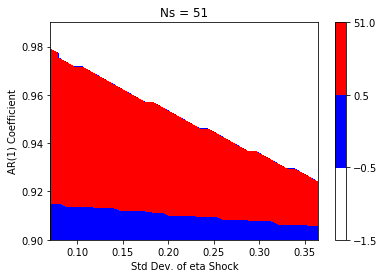

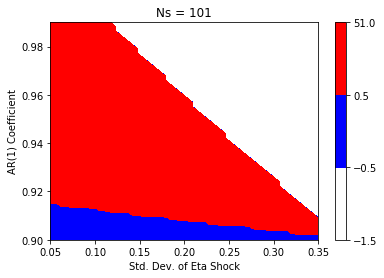

In [5]:
#generate heat map as function of rho and std. deviation of shock
import matplotlib.pyplot as plt
fig3, axs3 = plt.subplots(1, 1)
pos = axs3.contourf(100.0*stdeta[:35], rhoeta, sol[:,:35],extend='neither',\
                    levels=[-1.5,-0.5,0.5,ns],colors=('w','b','r'))
axs3.set_xlabel('Std Dev. of eta Shock')
axs3.set_ylabel('AR(1) Coefficient')
axs3.set_title('Ns = 51')

fig2, axs2 = plt.subplots(1, 1)
fig2.colorbar(pos,ax=axs3)

pos = axs2.contourf(100.0*stdeta1, rhoeta, sol1,extend='neither',\
                    levels=[-1.5,-0.5,0.5,ns],colors=('w','b','r'))
axs2.set_xlabel('Std. Dev. of Eta Shock')
axs2.set_ylabel('AR(1) Coefficient')
axs2.set_title('Ns = 101')
fig2.colorbar(pos,ax=axs2)
plt.show()